In [1]:
!pip install nba_api

In [2]:
# Import packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)
# Load players file
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [14]:
# Get team ID based on team name
def get_team_id(queried_team):
  for team in teams:
    if team['teamName'] == queried_team:
      return team['teamId']
  return -1
# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['playerId']
  return -1

In [11]:
teams

[{'teamId': 1610612737,
  'abbreviation': 'ATL',
  'teamName': 'Atlanta Hawks',
  'simpleName': 'Hawks',
  'location': 'Atlanta'},
 {'teamId': 1610612738,
  'abbreviation': 'BOS',
  'teamName': 'Boston Celtics',
  'simpleName': 'Celtics',
  'location': 'Boston'},
 {'teamId': 1610612751,
  'abbreviation': 'BKN',
  'teamName': 'Brooklyn Nets',
  'simpleName': 'Nets',
  'location': 'Brooklyn'},
 {'teamId': 1610612766,
  'abbreviation': 'CHA',
  'teamName': 'Charlotte Hornets',
  'simpleName': 'Hornets',
  'location': 'Charlotte'},
 {'teamId': 1610612741,
  'abbreviation': 'CHI',
  'teamName': 'Chicago Bulls',
  'simpleName': 'Bulls',
  'location': 'Chicago'},
 {'teamId': 1610612739,
  'abbreviation': 'CLE',
  'teamName': 'Cleveland Cavaliers',
  'simpleName': 'Cavaliers',
  'location': 'Cleveland'},
 {'teamId': 1610612742,
  'abbreviation': 'DAL',
  'teamName': 'Dallas Mavericks',
  'simpleName': 'Mavericks',
  'location': 'Dallas'},
 {'teamId': 1610612743,
  'abbreviation': 'DEN',
  'tea

In [8]:
# Get the player ID number for LeBron James
get_player_id('LeBron', 'James')

2544

In [15]:
shot_json = shotchartdetail.ShotChartDetail(
    team_id = get_team_id('Golden State Warriors'),
    player_id = get_player_id('Stephen', 'Curry'),
    context_measure_simple = 'PTS',
    season_nullable = '2015-16',
    season_type_all_star = 'Regular Season')

In [16]:
# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

In [17]:
# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

In [18]:
# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [19]:
# Create pandas DataFrame
curry_data = pd.DataFrame(rows)
curry_data.columns = headers

In [20]:
# Print the columns of our DataFrame
curry_data.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [22]:
# Function to draw basketball court
def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, 
                                  theta2=180, facecolor='none', edgecolor=color, lw=2))
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)


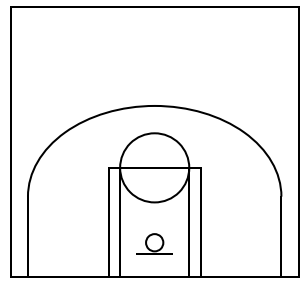

In [47]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.show()

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


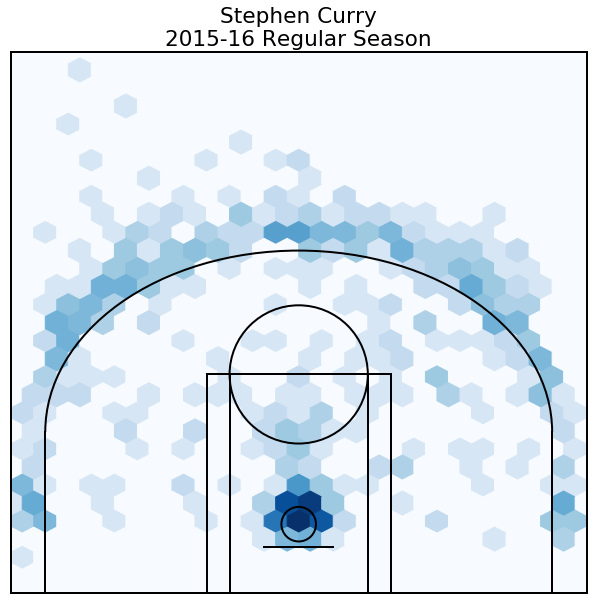

In [57]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(8, 7.52))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.title('Stephen Curry\n2015-16 Regular Season')
plt.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

In [58]:
shot_json = shotchartdetail.ShotChartDetail(
    team_id = get_team_id('Brooklyn Nets'),
    player_id = get_player_id('Brook', 'Lopez'),
    context_measure_simple = 'PTS',
    season_nullable = '2012-13',
    season_type_all_star = 'Regular Season')

# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
lopez_2013 = pd.DataFrame(rows)
lopez_2013.columns = headers

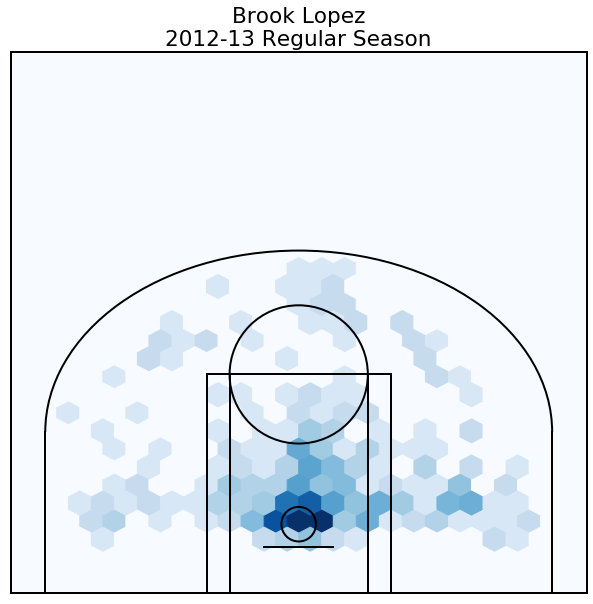

In [59]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(8, 7.52))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.title('Brook Lopez\n2012-13 Regular Season')
plt.hexbin(lopez_2013['LOC_X'], lopez_2013['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')


In [60]:
shot_json = shotchartdetail.ShotChartDetail(
    team_id = get_team_id('Milwaukee Bucks'),
    player_id = get_player_id('Brook', 'Lopez'),
    context_measure_simple = 'PTS',
    season_nullable = '2018-19',
    season_type_all_star = 'Regular Season')

# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
lopez_2019 = pd.DataFrame(rows)
lopez_2019.columns = headers

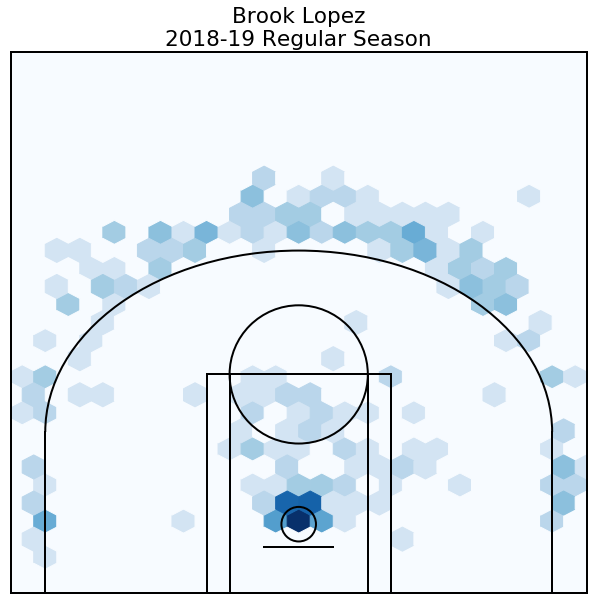

In [62]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(8, 7.52))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.title('Brook Lopez\n2018-19 Regular Season')
plt.hexbin(lopez_2019['LOC_X'], lopez_2019['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')


## Pulling Retired Players

So unfortunately the NBA API only pulls playerid's for active players so you can't use the exact same code as above. 

To get retired playid's you need to go to stats.nba.com and go to the player page. Within the URL there will be the playerid. 

For example, I wanted to look at Allen Iverson's MVP season so I found his player page: https://www.nba.com/stats/player/947/career/

Then I put in 947 in for the playerid and it worked!

In [65]:
shot_json = shotchartdetail.ShotChartDetail(
    team_id = get_team_id('Philadelphia 76ers'),
    player_id = 947,
    context_measure_simple = 'PTS',
    season_nullable = '2000-01',
    season_type_all_star = 'Regular Season')

# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
iverson_mvp = pd.DataFrame(rows)
iverson_mvp.columns = headers

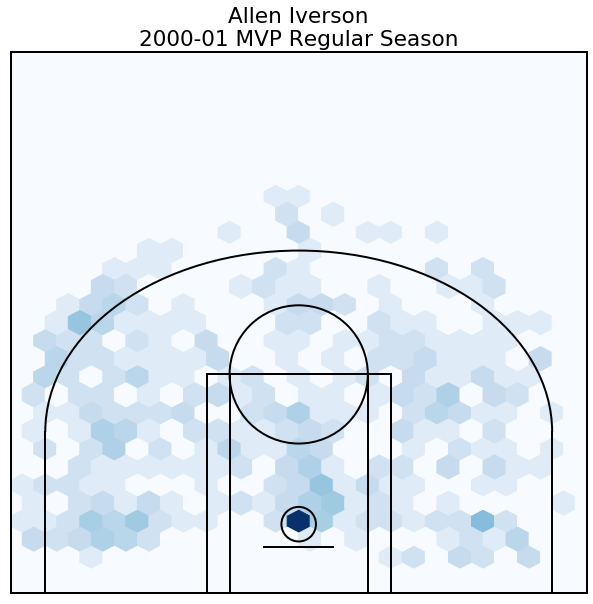

In [66]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(8, 7.52))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.title('Allen Iverson\n2000-01 MVP Regular Season')
plt.hexbin(iverson_mvp['LOC_X'], iverson_mvp['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')


In [67]:
shot_json = shotchartdetail.ShotChartDetail(
    team_id = get_team_id('Houston Rockets'),
    player_id = get_player_id('James', 'Harden'),
    context_measure_simple = 'PTS',
    season_nullable = '2017-18',
    season_type_all_star = 'Regular Season')

# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
harden_2018 = pd.DataFrame(rows)
harden_2018.columns = headers

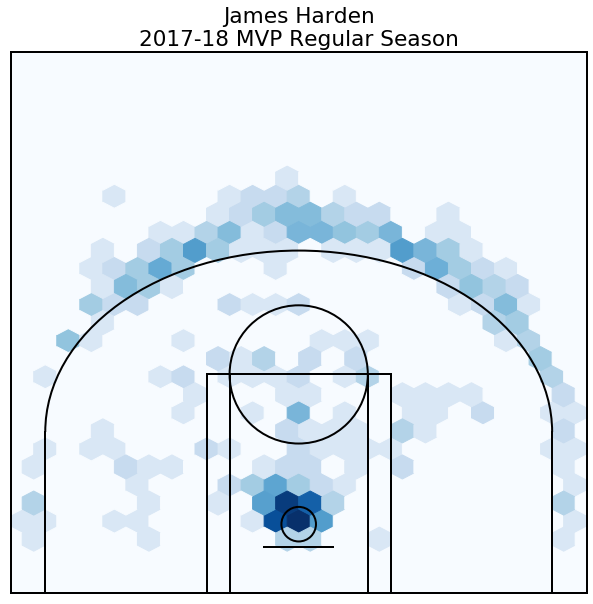

In [68]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(8, 7.52))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.title('James Harden\n2017-18 MVP Regular Season')
plt.hexbin(harden_2018['LOC_X'], harden_2018['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')
